
###### <img src="https://www.gannett-cdn.com/presto/2019/08/05/USAT/f44c4aba-531f-44b0-ae1e-4d6d678d4bcc-AP_APTOPIX_Ohio_Shooting.JPG?width=750&height=500&fit=crop&format=pjpg&auto=webp" alt="Mourners gather for a vigil at the scene of a mass shooting on Aug. 4, 2019, in Dayton, Ohio. Photo credit: John Minchillo, AP" />

###### Mourners gather for a vigil at the scene of a mass shooting on Aug. 4, 2019, in Dayton, Ohio. Photo credit: John Minchillo, AP

# U.S. Mass Shooting Analysis (1982 - 2023)

The time is 2:20 PDT. 

In Half Moon Bay, California, 67-year old Chunli Zhao has opened fire at two nearby farms killing 7 victims and injuring 1. Zhun has just committed the 139th mass shooting* in the United States, only 23 days into the new year.

Mass shootings are becoming an all too common occurrence in the United States... 

Our data acquired from [Mother Jones](https://www.motherjones.com/), an American progressive magazine focusing on news, commentary, and investigative journalism, contains the details of various mass shooting events in the U.S. across several categories. In this analysis, we are going to find the answers to questions like:

- Should background checks for prior mental health issues be mandatory for buyers when purchasing a weapon?
- Which governors have taken legislative action following a mass shooting in their state?

### How should we define ‘mass shooting’?

Sources like The Gun Violence Archive, an online archive of gun violence incidents collected from over 7,500 law enforcement, media, government and commercial sources daily, and CNN, define a mass shooting as one in which "at least four people are shot, excluding the shooter." 

Mass Shooting Tracker, a crowd-sourced data base, defines mass shooting as “a single outburst of violence in which four or more people are shot.” Everytown For Gun Safety defines a mass shooting as any incident in which four or more people are shot and killed, excluding the shooter.

While they're are multiple ways to define a mass shooting, the one I prefer as well as the one I believe used to standardize this Mother Jones database is the definition that cites a [2012 legislation defining](https://www.fbi.gov/file-repository/active-shooter-incidents-in-the-us-2021-052422.pdf/view) a “mass killing” as “three or more <u>killings</u> in a single incident.”
        
###### *Mother Jones Editor’s note 4/24/22: Readers may wonder why this database does not include [...] such attacks in which fewer than three victims died; for additional context on the challenges of defining and tracking mass shootings, and on our approach, see this [piece](https://www.nytimes.com/2015/12/04/opinion/how-many-mass-shootings-are-there-really.html) and this [piece](https://www.motherjones.com/politics/2015/12/no-there-were-not-355-mass-shootings-this-year/).*




##### **A few things to know about the data we have here...*

This data was acquired, analyzed, cleaned and visualized from a single source, [Mother Jones](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/), an open-source database documenting mass shootings in the United States from 1982 - present.  

###### *"Our investigation provides an in-depth look at a distinct phenomenon—from the firearms used and mental health factors to the growing copycat problem. Tracking mass shootings is complex; we believe ours is the most useful approach for studying this specific phenomenon." For analysis and context on this data—including how we built the database, and a change to the baseline for victim fatalities with cases dating from January 2013—see our [Guide to Mass Shootings in America...](https://www.motherjones.com/politics/2012/07/mass-shootings-map/)- Mother Jones*

There are 3 rows of data I'd like to explain:

**Case Id: 14 Name: Sacramento County Church Shooting**

- In this case, the shooter has been identified by reports as a "random man" without a first or last name. As such, that is his first name and shooter name in the dataset.


**Case Id: 62 Name: San Bernardino Mass Shooting**

**Case Id: 23 Name: Jersey City Kosher Market Shooting**

- In both of these cases there are one male and one female shooter, creating a double name value (Syed & Tashfeen/David & Francine) in the [shooter_first_name] column and a (M & F) value in the [gender] column.

- In the [shooter_age] column, in the case of the San Bernardino Mass Shooting, the shooters were the same age so the [shooter_ age] column was calculated as one age, 28.

- In the case of Jersey City Kosher Market Shooting, the shooter age column was calculated based off of the individual ages of each shooter (David N. Anderson, 47, and Francine Graham, 50) giving them a [shooter_age] of 97*


##### With the data we have... let's start answering some questions. Follow along with my [visualization in Tableau!](https://public.tableau.com/views/U_S_MassShootingAnalysis1982-2023/U_S_MassShootingAnalysis1982-2023?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

##### *A snapshot of our dataset:*

In [17]:
shoot = pd.read_csv(r'C:\Users\flowe\OneDrive\Documents\MYSQL\Mass Shooting project\blancdemoV3.csv')
shoot

,case_id,name_of_shooting,city,state,governor,state_party_affiliation,city_state,date,shooter_first_name,shooter_name,...,weapons_obtained_legally,where_obtained_desc,where_obtained,weapon_type_desc,weapon_type,race,gender,latitude,longitude,year
0,1,Half Moon Bay Spree Shooting,Half Moon Bay,California,Gavin Newsom,D,"Half Moon Bay, California",1/23/2023,Chunli,Chunli Zhao,...,Not Specified,Not specified,Not Specified,Not Specified,Not Specified,Asian,M,37.463600,-122.428600,2023
1,2,L.A. Dance Studio Mass Shooting,Monterey Park,California,Gavin Newsom,D,"Monterey Park, California",1/21/2023,Huu,Huu Can Tran,...,Not Specified,Not specified,Not Specified,Semiautomatic Assault Weapon (Details Pending),Not Specified,Asian,M,34.062511,-118.122849,2023
2,3,Virginia Walmart Shooting,Chesapeake,Virginia,Glenn Youngkin,R,"Chesapeake, Virginia",11/22/2022,Andre,Andre Bing,...,Not Specified,Not specified,Not Specified,Semiautomatic Handgun,Semiautomatic Handgun,Black,M,36.779591,-76.288376,2022
3,4,LGBTQ Club Shooting,Colorado Springs,Colorado,Jared Polis,D,"Colorado Springs, Colorado",11/19/2022,Anderson,Anderson L. Aldrich,...,Not Specified,Not specified,Not Specified,Semiautomatic Rifle; Semiautomatic Handgun,Two or More Types of Weapons,White,M,38.833882,-104.821363,2022
4,5,University Of Virginia Shooting,Charlottesville,Virginia,Glenn Youngkin,R,"Charlottesville, Virginia",11/13/2022,Christopher,Christopher Darnell Jones Jr.,...,Yes,"Dance's sporting goods; Colonial Heights, VA",Sporting Goods Store,Semiautomatic Pistol,Semiautomatic Pistol,Black,M,38.033554,-78.507980,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Shopping Centers Spree Killings,Palm Bay,Florida,Bob Martinez,R,"Palm Bay, Florida",4/23/1987,William,William Cruse,...,Yes,"Gun store in Norwood, OH the Oaks Trading Post...",Gun Store,"One Rifle, One Revolver, One Shotgun",Two or More Types of Weapons,White,M,28.033189,-80.642970,1987
135,136,United States Postal Service Shooting,Edmond,Oklahoma,George Nigh,D,"Edmond, Oklahoma",8/20/1986,Patrick,Patrick Sherrill,...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Issued,Three Semiautomatic Handguns,Semiautomatic Handgun,White,M,35.667201,-97.429370,1986
136,137,San Ysidro Mcdonald's Massacre,San Ysidro,California,George Deukmejian,R,"San Ysidro, California",7/18/1984,James,James Oliver Huberty,...,Yes,Unknown,Unknown,"One Semiautomatic Handgun, One Rifle (Assault)...",Two or More Types of Weapons,White,M,32.552001,-117.043081,1984
137,138,Dallas Nightclub Shooting,Dallas,Texas,Mark White,D,"Dallas, Texas",6/29/1984,Abdelkrim,Abdelkrim Belachheb,...,No,"Hines Boulevard Pawn Shop in Dallas, TX",Pawn Shop,One Semiautomatic Handgun,Semiautomatic Handgun,White,M,32.925166,-96.838676,1984


In [18]:
shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case_id                           139 non-null    int64  
 1   name_of_shooting                  139 non-null    object 
 2   city                              139 non-null    object 
 3   state                             139 non-null    object 
 4   governor                          139 non-null    object 
 5   state_party_affiliation           139 non-null    object 
 6   city_state                        139 non-null    object 
 7   date                              139 non-null    object 
 8   shooter_first_name                139 non-null    object 
 9   shooter_name                      139 non-null    object 
 10  summary                           139 non-null    object 
 11  fatalities                        139 non-null    int64  
 12  injured 

Starting with U.S. cities, how many mass shooting events have taken place and where?

In [19]:
shoot.groupby('city')['city'].count().sort_values(ascending=False)

city
Colorado Springs    3
Aurora              3
Fort Lauderdale     2
Orange              2
Orlando             2
                   ..
Goleta              1
Gilroy              1
Garden City         1
Fresno              1
Yountville          1
Name: city, Length: 125, dtype: int64

Colorado Springs most recent mass shooting took place in 2022 at an LGBTQ nightclub. Anderson L. Aldrich, 22, wore body armor and opened fire upon entering the club as a dance party was underway; he was subdued by unarmed patrons who tackled him amid the carnage and held him down until police arrived.


Lets build a simple plot with this information:


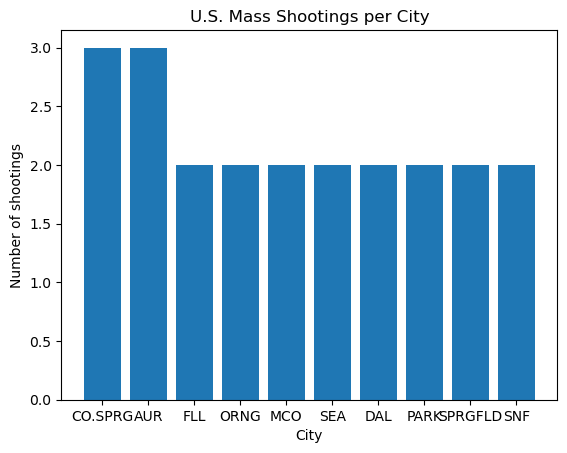

<Figure size 3000x3000 with 0 Axes>

In [13]:
np_city = np.array(['Colorado Springs', 'Aurora', 'Fort Lauderdale', 'Orange', 'Orlando', 'Seattle', 'Dallas', 'Parkland', 'Springfield', 'San Francisco'])
np_shoot = np.array([3, 3, 2, 2, 2, 2, 2, 2, 2, 2])
points_size = [300,300,100,100,100,100,100,100,100,100]
plt.bar(np_city, np_shoot)

# Strings
xlab = 'City'
ylab = 'Number of shootings'
title = 'U.S. Mass Shootings per City'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

plt.xticks(['Colorado Springs', 'Aurora', 'Fort Lauderdale', 'Orange', 'Orlando', 'Seattle', 'Dallas', 'Parkland', 'Springfield', 'San Francisco'],
['CO.SPRG','AUR', 'FLL', 'ORNG', 'MCO', 'SEA', 'DAL', 'PARK', 'SPRGFLD', 'SNF'])

# Add title
plt.title(title)

# After customizing, display the plot
figure(figsize=(10, 10), dpi=300)
plt.show() 

How about U.S. states? 

In [ ]:
shoot['state'].value_counts()

California        25
Texas             12
Florida           12
Colorado           8
Washington         7
Pennsylvania       5
Wisconsin          5
New York           5
Illinois           5
Maryland           4
Ohio               4
Virginia           4
Connecticut        3
Michigan           3
Georgia            3
North Carolina     3
Minnesota          2
South Carolina     2
Oregon             2
Kentucky           2
Tennessee          2
Nevada             2
Missouri           2
Oklahoma           2
Indiana            2
Nebraska           1
Arkansas           1
Hawaii             1
Massachusetts      1
Mississippi        1
Utah               1
Arizona            1
Louisiana          1
Alabama            1
D.C.               1
New Jersey         1
Kansas             1
Iowa               1
Name: state, dtype: int64

25 mass shootings in the state of California alone. 

*On June 30, 2022, Governor Gavin Newsom signed Assembly Bill (AB) 1621 (stats. 2022, ch. 76). Among other things, AB 1621 replaces the current Penal Code section 30400. The new Penal Code section 30400, subdivision (a) takes effect immediately and states: “it shall be unlawful for a person to purchase, sell, offer to sell, or transfer ownership of any firearm precursor part in this state that is not a federally regulated firearm precursor part.” In other words, no firearm precursor parts may be legally purchased, sold, offered for sale, or transferred unless such firearm precursor parts meet the definition of a “federally regulated firearm precursor part.”* 

Let's take a look at state party affiliation? Based on prior knowledge of party views, which states do you think would have more mass shootings events?


In [ ]:
shoot.groupby('state_party_affiliation')['state_party_affiliation'].count()

state_party_affiliation
D    70
R    69
Name: state_party_affiliation, dtype: int64

Surprised? Take a look at the dataset here and you might find some interesting stuff. Like when Texas was a Democratic state under Gov. Mark White in 1984.

A dreaded question. Where have the most fatalities occured?

Per city?

In [ ]:
shoot.groupby('city')['fatalities'].sum().sort_values(ascending=False).head(50)

city
Las Vegas             58
Orlando               54
Blacksburg            32
Newtown               27
Sutherland Springs    26
Killeen               24
San Ysidro            22
El Paso               22
Aurora                21
Parkland              21
Uvalde                21
Atlanta               17
Fort Hood             16
Edmond                15
Binghamton            14
San Bernardino        14
Seattle               13
Littleton             13
Washington            12
Thousand Oaks         12
Virginia Beach        12
San Francisco         12
Fort Lauderdale       11
Monterey Park         11
Dallas                11
Pittsburgh            11
Colorado Springs      11
Boulder               10
Jacksonville          10
Santa Fe              10
Buffalo               10
Red Lake              10
San Jose               9
Manchester             9
Louisville             9
Orange                 9
Charleston             9
Omaha                  9
Roseburg               9
Dayton              

The Las Vegas Strip Masacre of 2017 is the single deadliest mass shooting event in U.S. history with a total of 58 fatalities and 604 total victims.

Per state?

In [ ]:
shoot.groupby('state')['fatalities'].sum().sort_values(ascending=False).head(50)

state
California        175
Texas             151
Florida           126
Nevada             63
Colorado           53
Virginia           53
Connecticut        41
New York           40
Washington         37
Wisconsin          28
Pennsylvania       27
Illinois           25
Georgia            22
Ohio               20
Oklahoma           19
North Carolina     17
Minnesota          17
Kentucky           15
Michigan           15
Maryland           14
Oregon             13
South Carolina     13
D.C.               12
Indiana            11
Missouri           10
Tennessee           9
Nebraska            9
Hawaii              7
Massachusetts       7
Mississippi         7
Iowa                6
Arizona             6
Utah                6
Arkansas            5
New Jersey          4
Kansas              3
Louisiana           3
Alabama             3
Name: fatalities, dtype: int64

It feels like nowhere is safe. Dance studios, concert venues, supermarkets. Where have mass shooting events typically taken place?

In [ ]:
shoot['location_of_shooting'].value_counts().sort_values(ascending=False)

Other        53
Workplace    51
School       20
Religious     8
Military      6
Airport       1
Name: location_of_shooting, dtype: int64

Let's take a look over the demographics of these offenders who are the oldest? Youngest?

In [ ]:
shoot['shooter_age'].sort_values(ascending=False)

22     97
1      72
8      70
0      67
106    66
       ..
5      15
68     15
113    15
14     15
114    11
Name: shooter_age, Length: 139, dtype: int64

In [ ]:
shoot.shooter_age.agg(['mean', 'min', 'max'])

mean    34.482014
min     11.000000
max     97.000000
Name: shooter_age, dtype: float64

###### * *check data summary notes for why max() is so high**

What are their genders?


In [ ]:
shoot['gender'].value_counts().sort_values(ascending=False)

M          134
F            3
M and F      2
Name: gender, dtype: int64

###### * *check data summary notes for (M & F) value**

Race?

In [ ]:
shoot['race'].value_counts().sort_values(ascending=False)

White              73
Black              24
Not Specified      12
Latino             11
Asian              10
Other               5
Native American     3
Unclear             1
Name: race, dtype: int64

How many of these shooters had mental health issues prior to these events and had access to weapons? Should mandatory background checks be issued before someone can buy a weapon? Who should issue them? Should they be free? How long in between failing a background check can someone reapply? So many questions... 

In [ ]:
shoot['prior_signs_mental_health_issues'].value_counts().sort_values(ascending=False)

Yes              66
Not Specified    26
Unclear          24
No               17
TBD               5
Unknown           1
Name: prior_signs_mental_health_issues, dtype: int64

Learning a little more about the weapons used. In how many cases were they legally obtained?

In [ ]:
shoot['weapons_obtained_legally'].value_counts().sort_values(ascending=False)

Yes              94
Not Specified    16
No               16
TBD               7
Unknown           6
Name: weapons_obtained_legally, dtype: int64

Where are these weapons being purchased from?

In [ ]:
shoot['where_obtained'].value_counts().sort_values(ascending=False)

Not Specified           47
Gun Store               17
Unknown                 15
Unclear                 12
Sporting Goods Store    11
Stolen                  10
Gun Range                7
TBD                      3
Pawn Shop                3
Online                   3
Gun Dealer               3
Family Member            2
Issued                   2
Trading Post             2
DIY                      1
Gun Show                 1
Name: where_obtained, dtype: int64

Hyatt Guns in Charlotte, NC is America’s largest gun shop and has been in business since 1959. They have over "7,000 guns in stock at any one time. [And] usually have the guns that other dealers cannot get." 

###### - from a statement from Hyatt Guns 'About Us' page"

What types of weapons are being used?

In [ ]:
shoot['weapon_type'].value_counts().sort_values(ascending=False)

Two or More Types of Weapons    55
Semiautomatic Handgun           42
Semiautomatic Rifle             14
Handgun                         12
Assault Rifle                    6
Shotgun                          4
Not Specified                    2
Two or More Weapons              2
Semiautomatic Pistol             1
Revolver                         1
Name: weapon_type, dtype: int64

In this notebook, we took a look at mass shooting events across the U.S. We extracted a few summary statistics from the data and unraveled some interesting facts and figures. What could the trend for mass shooting events look like over the next 5 years? 10? Head over to [Tableau](https://public.tableau.com/shared/QDT47WTNK?:display_count=n&:origin=viz_share_link) and take a look at some forecasted estimates.

* *Creator's note: For the next part of this analysis, I am going to join our table to another table of victim data (gender, ages, life expectancy, etc.) sourced from The Violence Project, a nonprofit, nonpartisan research center dedicated to reducing violence in society and using data and analysis to improve policy and practice, and create visualizatons based on patterns.*